In [1]:
# 导入库
import numpy as np
import pandas as pd 
import scipy
# 绘图库
import matplotlib.pylab as plt
import seaborn as sns
from jupyterthemes import jtplot
from ipywidgets import Image
from io import StringIO
import pydotplus
# warning库
import warnings

# jupyter内作图
%matplotlib inline 
sns.set()

jtplot.style(theme='onedork') # 选择一个绘图主题 
warnings.filterwarnings('ignore') # 忽略警告
np.set_printoptions(suppress=True) #取消科学计数法

#  一个好用的数据csv https://labfile.oss.aliyuncs.com/courses/906/los_census.csv"
# 人口收入普查数据 'https://labfile.oss.aliyuncs.com/courses/1283/adult.data.csv'
# 电信用户离网数据 'https://labfile.oss.aliyuncs.com/courses/1283/telecom_churn.csv'

# 数据预处理技术

In [2]:
from sklearn import preprocessing

In [3]:
data = pd.read_csv( 'https://labfile.oss.aliyuncs.com/courses/906/los_census.csv')
data.head()

,Zip Code,Total Population,Median Age,Total Males,Total Females,Total Households,Average Household Size
0,91371,1,73.5,0,1,1,1.00
1,90001,57110,26.6,28468,28642,12971,4.40
2,90002,51223,25.5,24876,26347,11731,4.36
3,90003,66266,26.3,32631,33635,15642,4.22
4,90004,62180,34.8,31302,30878,22547,2.73


In [4]:
data_standardized = pd.DataFrame(preprocessing.scale(data),columns=data.columns)

In [5]:
data_standardized.head()

,Zip Code,Total Population,Median Age,Total Males,Total Females,Total Households,Average Household Size
0,0.408327,-1.538159,4.259807,-1.527548,-1.543235,-1.751142,-2.191077
1,-1.102255,1.104495,-1.143815,1.125417,1.080088,0.320474,1.883964
2,-1.101152,0.832081,-1.270553,0.790674,0.869882,0.122417,1.836023
3,-1.100050,1.528179,-1.178380,1.513371,1.537413,0.747097,1.668227
4,-1.098947,1.339104,-0.199045,1.389520,1.284891,1.849989,-0.117600


In [6]:
data_scaler = preprocessing.MinMaxScaler(feature_range=(0,1)) # 制作放缩器,所有数值在指定的范围内

data_scalered = pd.DataFrame(data=data_scaler.fit_transform(data), columns=data.columns)
data_scalered.head()

,Zip Code,Total Population,Median Age,Total Males,Total Females,Total Households,Average Household Size
0,0.381616,0.000009,0.993243,0.000000,0.000019,0.000032,0.214133
1,0.000000,0.541076,0.359459,0.539228,0.538535,0.417248,0.942184
2,0.000279,0.485301,0.344595,0.471190,0.495384,0.377360,0.933619
3,0.000557,0.627822,0.355405,0.618082,0.632415,0.503169,0.903640
4,0.000836,0.589110,0.470270,0.592908,0.580577,0.725287,0.584582


In [7]:
data_normalized = pd.DataFrame(data=preprocessing.normalize(data,norm='l1'), columns=data.columns)
data_normalized.head()

,Zip Code,Total Population,Median Age,Total Males,Total Females,Total Households,Average Household Size
0,0.999153,0.000011,0.000804,0.000000,0.000011,0.000011,0.000011
1,0.414325,0.262910,0.000122,0.131054,0.131855,0.059713,0.000020
2,0.440735,0.250836,0.000125,0.121816,0.129020,0.057446,0.000021
3,0.377834,0.278186,0.000110,0.136986,0.141200,0.065665,0.000018
4,0.379846,0.262420,0.000147,0.132105,0.130315,0.095156,0.000012


In [8]:
data_binarized = pd.DataFrame(data=preprocessing.Binarizer(threshold=1.4).transform(data), columns=data.columns)
data_binarized.head()

,Zip Code,Total Population,Median Age,Total Males,Total Females,Total Households,Average Household Size
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0


# 标记编码方法

In [9]:
one_hot_encoder = preprocessing.OneHotEncoder()
one_hot_encoder.fit([[1,2,3,4], [2,3,6,1], [5,5,3,8], [6,4,9,1]])
encoded_newdata = one_hot_encoder.transform([[5,5,3,8]]).toarray()
encoded_newdata

array([[0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1.]])

In [10]:
# 建立标记编码器(label encoder)
laber_encoder = preprocessing.LabelEncoder()
# 定义标记
labers = data.columns
# 标记编码
laber_encoder.fit(labers)
laber_encoded = laber_encoder.transform(labers)

for i,item in enumerate(laber_encoder.classes_):
    print(item,'->',i)
print(labers)
print(list(laber_encoded))

Average Household Size -> 0
Median Age -> 1
Total Females -> 2
Total Households -> 3
Total Males -> 4
Total Population -> 5
Zip Code -> 6
Index(['Zip Code', 'Total Population', 'Median Age', 'Total Males',
       'Total Females', 'Total Households', 'Average Household Size'],
      dtype='object')
[6, 5, 1, 4, 2, 3, 0]


# 创建回归器

In [11]:
from sklearn.model_selection import train_test_split #创建分类器
y = data['Average Household Size']
X_train,X_test,y_train,y_test = train_test_split(data.values,y,test_size=0.3,random_state=20)
data.index

RangeIndex(start=0, stop=319, step=1)

In [12]:
from sklearn import linear_model
linear_regressor = linear_model.LinearRegression()  #建立线性回归器
linear_regressor.fit(X_train[:,1].reshape(-1,1),y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

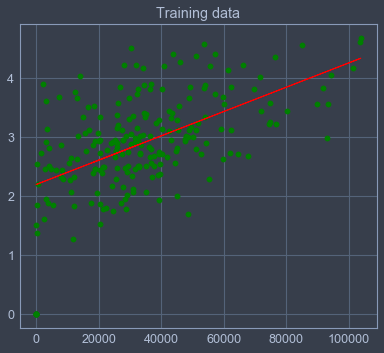

In [13]:
y_predect = linear_regressor.predict(X_train[:,1].reshape(-1,1))
plt.figure()
plt.scatter(X_train[:,1],y_train,color='green')
plt.plot(X_train[:,1],y_predect,color='red',linewidth=1)
plt.title('Training data')
plt.show()

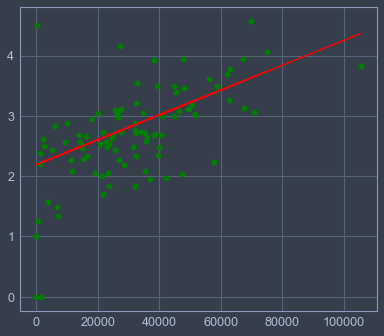

In [14]:
# 模型预测
y_test_pred = linear_regressor.predict(X_test[:,1].reshape(-1,1))
plt.figure()
plt.scatter(X_test[:,1],y_test,color='green')
plt.plot(X_test[:,1],y_test_pred,color='red',linewidth=1)
plt.show()

In [15]:
import sklearn.metrics as sm

In [16]:
print('平均绝对误差=', round(sm.mean_absolute_error(y_test,y_test_pred),2))
 #均方误差越低越好,保持最低
print('均方误差=', round(sm.mean_squared_error(y_test,y_test_pred),2))
# 消除异常值干扰
print('中位数绝对误差=', round(sm.median_absolute_error(y_test,y_test_pred),2))
#解释方差越高越好，保持最高,对数据集的波动解释能力，最高1.0
print('解释方差得分=', round(sm.explained_variance_score(y_test,y_test_pred),2)) 
# R方反应数据的确定性相关系数，越高越好，最高1.0
print('R方得分=', round(sm.r2_score(y_test,y_test_pred),2))

平均绝对误差= 0.48
均方误差= 0.47
中位数绝对误差= 0.34
解释方差得分= 0.35
R方得分= 0.32


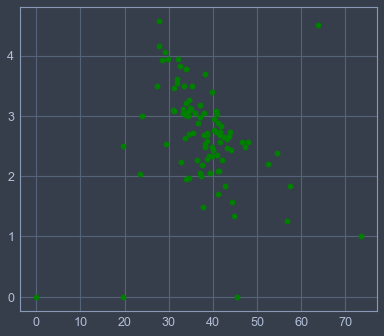

In [17]:
ridge_regressor = linear_model.Ridge(alpha=0.01)
#alpha参数控制回归器的复杂程度，当alpha=0时，Ridge=LineRegression;fit_intercept代表截距

ridge_regressor.fit(X_train[:,2].reshape(-1,1),y_train)
y_test_ridge_pred = ridge_regressor.predict(X_test[:2].reshape(-1,1))
plt.figure()
plt.scatter(X_test[:,2], y_test, color='green')
plt.show()

In [18]:
from sklearn.preprocessing import PolynomialFeatures

polynomial = PolynomialFeatures(degree=10)  # 多项式分段，分为25段
X_train_poly  = polynomial.fit_transform(X_train)
poly_linear_regressor = linear_model.LinearRegression()
poly_linear_regressor.fit(X_train_poly[:,1].reshape(-1,1),y_train)
y_pred_poly = poly_linear_regressor.predict(X_test[:,1].reshape(-1,1))
print(y_test[0])
y_pred_poly[0]

1.0


-6.448234426539014

In [19]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import datasets

#读取标准房价数据
housing_data = datasets.load_boston()
# housing_data.data 影响房价的相关数据
# housing_data.target对应房价

In [20]:
housing_x_train,housing_x_test,housing_y_train,housing_y_test=train_test_split(housing_data.data,
housing_data.target,test_size=0.2,random_state=15)

In [21]:
# 训练决策树回归模型
dt_regressor = DecisionTreeRegressor(max_depth=4)
dt_regressor.fit(housing_x_train,housing_y_train)
# 训练 AdaBoost算法回归模型
ab_regressor = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),n_estimators=400,random_state=7)
ab_regressor.fit(housing_x_train,housing_y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=4,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                                       random_state=None,
                                                       splitter='best'),
                  

In [22]:
y_pred_dt = dt_regressor.predict(housing_x_test)
y_pred_ab = ab_regressor.predict(housing_x_test)
#决策树的表现
print('决策树的表现')
print('均方误差=', round(sm.mean_squared_error(housing_y_test,y_pred_dt),2))
print('中位数绝对误差=', round(sm.median_absolute_error(housing_y_test,y_pred_dt),2))
print('解释方差得分=', round(sm.explained_variance_score(housing_y_test,y_pred_dt),2)) 

# AdaBoost算法的表现
print('AdaBoost算法的表现')
print('均方误差=', round(sm.mean_squared_error(housing_y_test,y_pred_ab),2))
print('中位数绝对误差=', round(sm.median_absolute_error(housing_y_test,y_pred_ab),2))
print('解释方差得分=', round(sm.explained_variance_score(housing_y_test,y_pred_ab),2)) 

决策树的表现
均方误差= 21.05
中位数绝对误差= 2.47
解释方差得分= 0.75
AdaBoost算法的表现
均方误差= 13.53
中位数绝对误差= 1.62
解释方差得分= 0.84


In [23]:
from sklearn.ensemble import RandomForestRegressor

#读取数据
bike_data = pd.read_csv('data_cache\hour.csv')

# 建立随机森林回归器
rf_regressor = RandomForestRegressor(n_estimators=1000,max_depth=10,min_samples_split=10)

# 设置训练集，测试集
bike_X_train,bike_X_test,bike_y_train,bike_y_test = train_test_split(bike_data.iloc[:,2:13].values, 
bike_data['cnt'],test_size=0.3, random_state=7)

# 拟合回归器
rf_regressor.fit(bike_X_train,bike_y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [24]:
y_pred_bike = rf_regressor.predict(bike_X_test)
print('随机森林的表现')
print('均方误差=', round(sm.mean_squared_error(bike_y_test,y_pred_bike),2))
print('中位数绝对误差=', round(sm.median_absolute_error(bike_y_test,y_pred_bike),2))
print('解释方差得分=', round(sm.explained_variance_score(bike_y_test,y_pred_bike),2)) 


随机森林的表现
均方误差= 2658.9
中位数绝对误差= 18.68
解释方差得分= 0.92


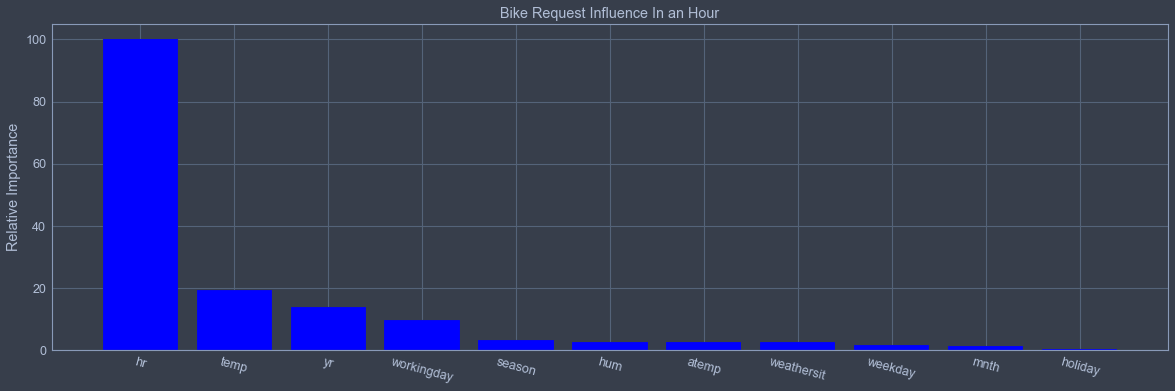

In [25]:
# 调用函数：检测特征对回归器的贡献
from draw_in_ml import plot_feature_importances as pfi
pfi(rf_regressor.feature_importances_,feature_names=bike_data.columns[2:13],color='blue',
    title='Bike Request Influence In an Hour')

In [26]:
#对按天统计的共享单车用户数量影响因素的分析

# 读取数据
bike_data_day = pd.read_csv('data_cache\day.csv')

# 设置训练集，测试集
day_X_train,day_X_test,day_y_train,day_y_test = train_test_split(bike_data_day.iloc[:,2:13].values,
bike_data_day['cnt'],test_size=0.3,random_state=9)

# 建立随机森林回归器
rf_regressor_day = RandomForestRegressor(n_estimators=2000,max_depth=10,min_samples_split=10)
rf_regressor_day.fit(day_X_train,day_y_train)

# 回归器预测
y_pred_day = rf_regressor_day.predict(day_X_test)

随机森林的表现
均方误差= 400277.4
中位数绝对误差= 301.08
解释方差得分= 0.91
 
----------------------------------我是华丽的分割线-----------------------------------------------------
 


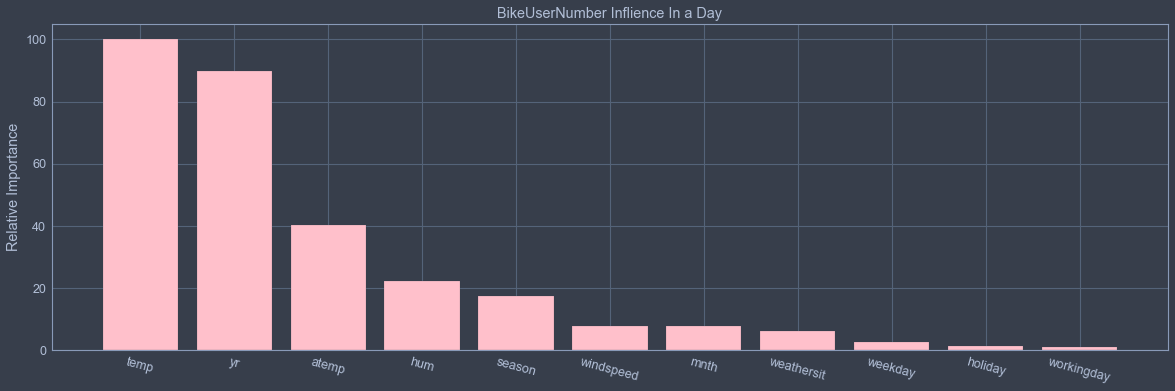

In [27]:
print('随机森林的表现')
print('均方误差=', round(sm.mean_squared_error(day_y_test,y_pred_day),2))
print('中位数绝对误差=', round(sm.median_absolute_error(day_y_test,y_pred_day),2))
print('解释方差得分=', round(sm.explained_variance_score(day_y_test,y_pred_day),2)) 

print(' ')
print('----------------------------------我是华丽的分割线-----------------------------------------------------')
print(' ')

pfi(rf_regressor_day.feature_importances_,feature_names=bike_data_day.columns[2:13],color='pink',
    title='BikeUserNumber Inflience In a Day')

In [28]:
# 将AbaBoost算法与随机森林进行比较 共享单车数据
ab_regressor_day = AdaBoostRegressor(DecisionTreeRegressor(max_depth=10),n_estimators=1000,random_state=5)
ab_regressor_day.fit(day_X_train,day_y_train)
y_pred_ab_day = ab_regressor_day.predict(day_X_test)

print('均方误差=',round(sm.mean_squared_error(day_y_test,y_pred_ab_day),2))
print('中位数绝对值误差=',round(sm.median_absolute_error(day_y_test,y_pred_ab_day),2))
print('解释方差得分=', round(sm.explained_variance_score(day_y_test,y_pred_ab_day),2))


均方误差= 412108.4
中位数绝对值误差= 264.5
解释方差得分= 0.9


# 创建分类器

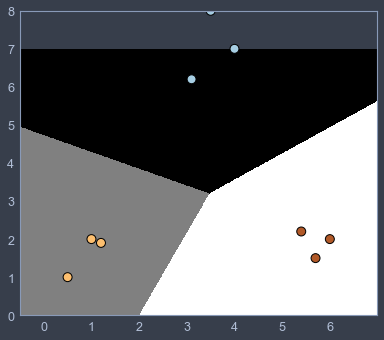

In [29]:
from sklearn.linear_model import LogisticRegression
from draw_in_ml import plot_classifier

X = np.array([[4,7],[3.5,8],[3.1,6.2],[0.5,1],[1,2],[1.2,1.9],[6,2],[5.7,1.5],[5.4,2.2]])
y = np.array([0,0,0,1,1,1,2,2,2])
lg_classifier = LogisticRegression(solver='liblinear',C=100)
lg_classifier.fit(X,y)
plot_classifier(lg_classifier,X,y)

In [30]:
from sklearn.naive_bayes import GaussianNB

churn_data = pd.read_csv('https://labfile.oss.aliyuncs.com/courses/1283/telecom_churn.csv')
# 找到列名，转化为列表
col = list(churn_data.columns)
# 把所有列的类型都转化为数值型，出错的地方填入NaN，再把NaN的地方补0
churn_data[col] = churn_data[col].apply(pd.to_numeric, errors='coerce').fillna(0.0)
# 至此，object的列（列中存储的是string类型）转成了float
churn_data = pd.DataFrame(churn_data,dtype='float')
X = churn_data.iloc[:,:-1].values
y = churn_data['Churn']

classifier_gaussiannb = GaussianNB()
classifier_gaussiannb.fit(X,y)

GaussianNB(priors=None, var_smoothing=1e-09)

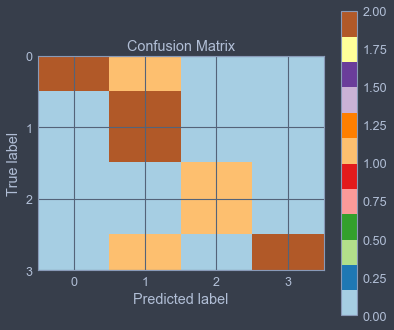

In [31]:
from sklearn.metrics import confusion_matrix
from draw_in_ml import plot_confusion_matrix

y_true = [1,0,0,2,1,0,3,3,3]
y_pred = [1,1,0,2,1,0,1,3,3]

confusion_mat = confusion_matrix(y_true,y_pred)
plot_confusion_matrix(confusion_mat)

In [32]:
# 提取性能报告
from sklearn.metrics import classification_report
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.50      1.00      0.67         2
           2       1.00      1.00      1.00         1
           3       1.00      0.67      0.80         3

    accuracy                           0.78         9
   macro avg       0.88      0.83      0.82         9
weighted avg       0.89      0.78      0.79         9



In [33]:
# 做出质量评估
from sklearn.ensemble import RandomForestClassifier

car_data = pd.read_csv('data_cache/car.data.csv')

car_data.buying[car_data['buying']=='vhigh'] = 3
car_data.buying[car_data['buying']=='high'] = 2
car_data.buying[car_data['buying']=='med'] = 1
car_data.buying[car_data['buying']=='low'] = 0
car_data.maint[car_data['maint']=='vhigh'] = 3
car_data.maint[car_data['maint']=='high'] = 2
car_data.maint[car_data['maint']=='med'] = 1
car_data.maint[car_data['maint']=='low'] = 0
car_data.lug_boot[car_data['lug_boot']=='small'] = 0
car_data.lug_boot[car_data['lug_boot']=='med'] = 1
car_data.lug_boot[car_data['lug_boot']=='big'] = 2
car_data.safety[car_data['safety'] =='low'] = 0
car_data.safety[car_data['safety'] =='med'] = 1
car_data.safety[car_data['safety'] =='high'] = 2
car_data.doors[car_data['doors']=='5more'] = 4
car_data.persons[car_data['persons']=='more'] = 5

car_data=car_data.astype('int')
X_train = car_data.iloc[:,:-1].values
y_train = car_data['safety']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
print(X_train)
print(y_train)

[[  0.   100.   510.   ...   2.     1.86   1.  ]
 [  0.    84.   415.   ...   4.     2.81   0.  ]
 [  0.   143.   510.   ...   4.     1.24   1.  ]
 ...
 [  0.    95.   408.   ...   2.     2.73   4.  ]
 [  0.    22.   415.   ...   3.     2.51   2.  ]
 [  0.    57.   415.   ...   7.     3.19   0.  ]]
1196    0.0
3301    1.0
602     0.0
1775    0.0
2506    0.0
       ... 
1630    0.0
2787    0.0
2076    1.0
2239    0.0
3285    0.0
Name: Churn, Length: 2666, dtype: float64


In [34]:
# 标记编码法

X = []
count = 0
with open('data_cache\car.data.csv','r') as f:
    for line in f.readlines():
        data = line[:-1].split(',')
        X.append(data)
X = np.array(X)[1:,:]

# 标记编码
label_coder=[]
X_encoded = np.empty(X.shape)
for i,item in enumerate(X[0]):
    label_coder.append(preprocessing.LabelEncoder())
    X_encoded[:,i] = label_coder[-1].fit_transform(X[:,i])
X = X_encoded[:,:-1].astype(int)
y = X_encoded[:,-1].astype(int)
print(X)
print(y.T)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)


[[3 3 0 0 2]
 [3 3 0 0 2]
 [3 3 0 0 2]
 ...
 [1 1 3 2 0]
 [1 1 3 2 0]
 [1 1 3 2 0]]
[1 2 0 ... 1 2 0]


In [35]:
rf_classifier = RandomForestClassifier(n_estimators=1000,max_depth=8,random_state=7)
rf_classifier.fit(X_train,y_train)
y_pred = rf_classifier.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       124
           1       0.02      0.02      0.02       115
           2       0.02      0.02      0.02       107

    accuracy                           0.01       346
   macro avg       0.01      0.01      0.01       346
weighted avg       0.01      0.01      0.01       346



In [36]:
from sklearn.model_selection import validation_curve
rf_classifier = RandomForestClassifier(max_depth=8,random_state=6)
parameter_grid = np.linspace(25,250,10).astype('int')
train_scores , validation_scores = validation_curve(rf_classifier,X_train,y_train,'n_estimators',parameter_grid,
                                                    cv=5)
print(train_scores)
print(validation_scores)

[[0.48687783 0.48778281 0.48372514 0.49095841 0.49367089]
 [0.49411765 0.49049774 0.48824593 0.49457505 0.49367089]
 [0.49502262 0.49049774 0.49095841 0.49728752 0.49457505]
 [0.49502262 0.49049774 0.49186257 0.49638336 0.49638336]
 [0.4959276  0.48959276 0.49186257 0.49728752 0.49909584]
 [0.4959276  0.49049774 0.49186257 0.49819168 0.49819168]
 [0.49502262 0.48959276 0.49095841 0.49819168 0.49728752]
 [0.49502262 0.49049774 0.49095841 0.49819168 0.49728752]
 [0.49502262 0.49230769 0.49095841 0.49819168 0.49909584]
 [0.49502262 0.49049774 0.49095841 0.49819168 0.49909584]]
[[0.06859206 0.06859206 0.06521739 0.04347826 0.05434783]
 [0.05415162 0.06498195 0.05072464 0.03623188 0.04710145]
 [0.05054152 0.07220217 0.04710145 0.02898551 0.04710145]
 [0.05054152 0.07220217 0.04347826 0.04347826 0.04710145]
 [0.05415162 0.07581227 0.04710145 0.03985507 0.05072464]
 [0.05054152 0.07220217 0.04710145 0.03985507 0.04710145]
 [0.05776173 0.07220217 0.05072464 0.03985507 0.04710145]
 [0.04693141 

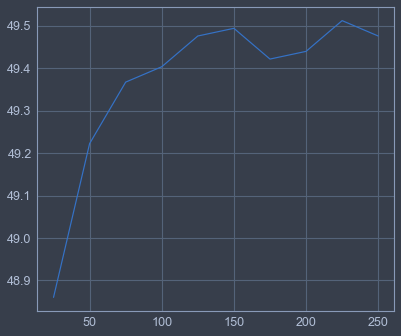

In [37]:
plt.figure()
plt.plot(parameter_grid,100*np.average(train_scores,axis=1))

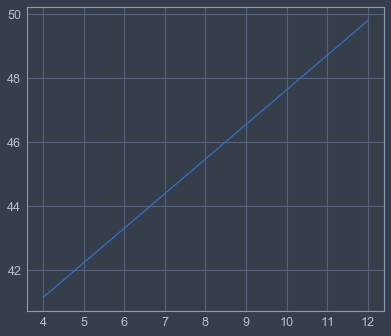

In [38]:
rf_classifier = RandomForestClassifier(n_estimators=200,random_state=6)
parameter_grid = np.linspace(4,12,2).astype('int')
train_scores , validation_scores = validation_curve(rf_classifier,X_train,y_train,'max_depth',parameter_grid,
                                                    cv=5)
plt.figure()
plt.plot(parameter_grid,100*np.average(train_scores,axis=1))

In [39]:
data=pd.read_csv('https://labfile.oss.aliyuncs.com/courses/1283/adult.data.csv')
print(data.shape)
data = data.values

# 数据预处理
label_coder=[]
data_encoded = np.empty(data.shape)
data_encoded[:,0]=data[:,0]
data_encoded[:,2]=data[:,2]
data_encoded[:,4]=data[:,4]
data_encoded[:,10]=data[:,10]
data_encoded[:,11]=data[:,11]
data_encoded[:,12]=data[:,12]
label_coder.append(preprocessing.LabelEncoder())
data_encoded[:,1] = label_coder[-1].fit_transform(data[:,1])
data_encoded[:,3] = label_coder[-1].fit_transform(data[:,3])
data_encoded[:,5] = label_coder[-1].fit_transform(data[:,5])
data_encoded[:,6] = label_coder[-1].fit_transform(data[:,6])
data_encoded[:,7] = label_coder[-1].fit_transform(data[:,7])
data_encoded[:,8] = label_coder[-1].fit_transform(data[:,8])
data_encoded[:,9] = label_coder[-1].fit_transform(data[:,9])
data_encoded[:,13] = label_coder[-1].fit_transform(data[:,13])
data_encoded[:,14] = label_coder[-1].fit_transform(data[:,14])
X = data_encoded[:,:-1].astype(int)
y = data_encoded[:,-1].astype(int)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.94,random_state=5)


(32561, 15)


In [40]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

ab_classifier = AdaBoostClassifier(GaussianNB(),n_estimators=200,random_state=7)
ab_classifier.fit(X,y)
y_pred = ab_classifier.predict(X_test)
f1 = cross_val_score(ab_classifier,X,y,scoring='f1_weighted',cv=5)
print('朴素贝叶斯增强学习分类器的F1得分:',str(round(100*f1.mean(),2)),'%')

朴素贝叶斯增强学习分类器的F1得分: 58.99 %


In [41]:
# 与K-临近分类器的对比
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X,y)
f1 = cross_val_score(knn_classifier,X,y,scoring='f1_weighted',cv=5)
print('K-临近分类器的F1得分:',str(round(100*f1.mean(),2)),'%')

K-临近分类器的F1得分: 75.38 %


In [42]:
# 与随机森林分类器的对比
rf_classifier = RandomForestClassifier(n_estimators=195,random_state=1500,max_depth=14)
rf_classifier.fit(X_train,y_train)
f1 = cross_val_score(rf_classifier,X_train,y_train,scoring='f1_weighted',cv=5)
print('随机森林分类器的F1得分:',str(round(100*f1.mean(),3)),'%')

随机森林分类器的F1得分: 84.933 %


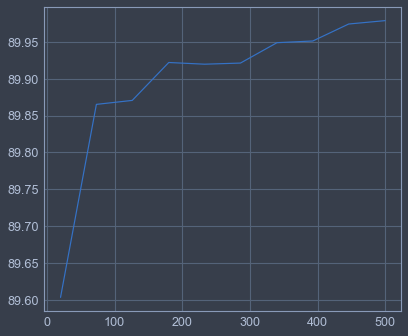

In [43]:
# 绘制验证曲线
rf_classifier = RandomForestClassifier(max_depth=14,random_state=1500)
parameter_grid = np.linspace(20,500,10).astype('int')
train_scores , validation_scores = validation_curve(rf_classifier,X,y,'n_estimators',parameter_grid,cv=5)
plt.figure()
plt.plot(parameter_grid,100*np.average(train_scores,axis=1))

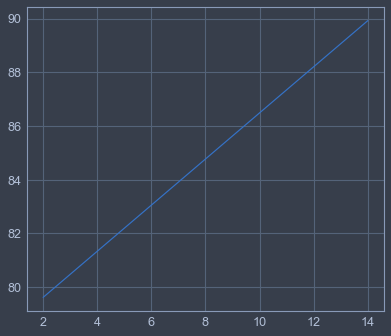

In [44]:
rf_classifier = RandomForestClassifier(n_estimators=180,random_state=1500)
parameter_grid = np.linspace(2,14,2).astype('int')
train_scores , validation_scores = validation_curve(rf_classifier,X,y,'max_depth',parameter_grid,cv=5)
plt.figure()
plt.plot(parameter_grid,100*np.average(train_scores,axis=1))

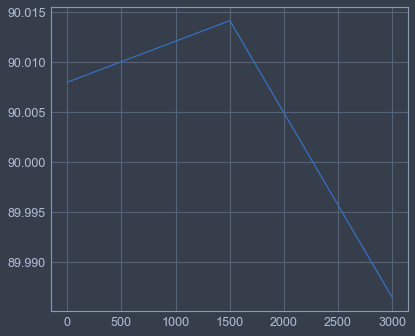

In [45]:
rf_classifier = RandomForestClassifier(n_estimators=180,max_depth=14)
parameter_grid = np.linspace(3,3000,3).astype('int')
train_scores , validation_scores = validation_curve(rf_classifier,X,y,'random_state',parameter_grid,cv=5)
plt.figure()
plt.plot(parameter_grid,100*np.average(train_scores,axis=1))

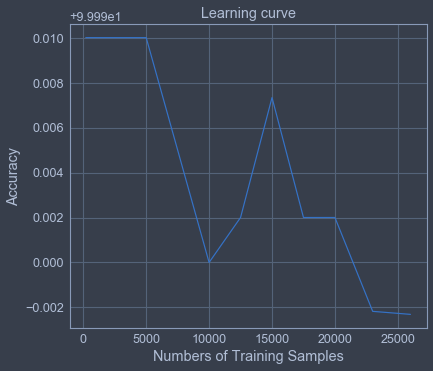

In [46]:
# 绘制学习曲线
from sklearn.model_selection import learning_curve
rf_classifier = RandomForestClassifier(random_state=7)
parameter_grid = np.array([200,500,1000,3000,5000,10000,12500,15000,17500,20000,23000,26000])
train_size,train_scores , validation_scores = learning_curve(rf_classifier,X,y,train_sizes=parameter_grid,cv=5)
plt.figure()
plt.plot(parameter_grid,100*np.average(train_scores,axis=1))
plt.title('Learning curve')
plt.xlabel('Numbers of Training Samples')
plt.ylabel('Accuracy')
plt.show()

# 支持向量机与预测建模

In [47]:
data_multivar = pd.read_csv('data_cache\data_multivar.txt',header=None)
data_multivar

,0,1,2
0,5.35,4.48,0
1,6.72,5.37,0
2,3.57,5.25,0
3,4.77,7.65,1
4,2.25,4.07,1
...,...,...,...
295,5.24,4.92,0
296,5.14,5.14,0
297,5.28,8.66,1
298,2.68,2.49,1


In [48]:
X1 = data_multivar[data_multivar[2]==0][0]
y1 = data_multivar[data_multivar[2]==0][1]
X2 = data_multivar[data_multivar[2]==1][0]
y2 = data_multivar[data_multivar[2]==1][1]


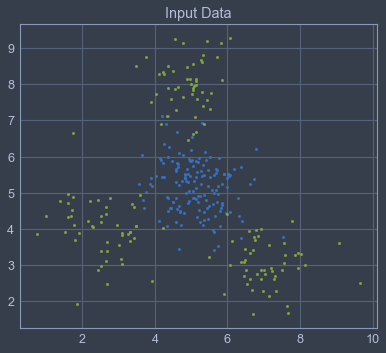

In [49]:
plt.figure()
plt.scatter(X1,y1,marker='.')
plt.scatter(X2,y2,marker='.')
plt.title('Input Data')
plt.show()

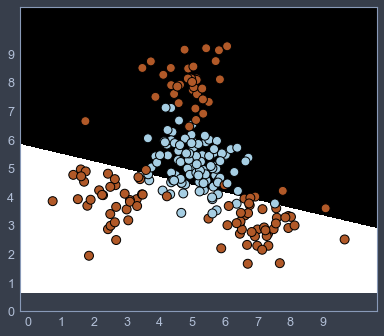

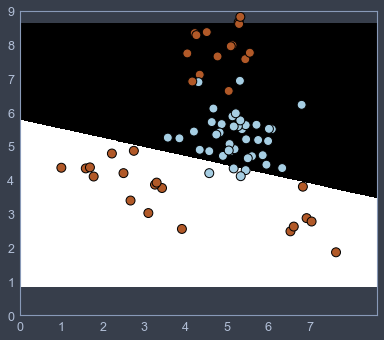

              precision    recall  f1-score   support

           0       0.69      0.90      0.78        40
           1       0.83      0.54      0.66        35

    accuracy                           0.73        75
   macro avg       0.76      0.72      0.72        75
weighted avg       0.75      0.73      0.72        75

########################################################################################################################
-------------------------------我是优雅简洁智慧伟岸的分割线--------------------------------------------
########################################################################################################################


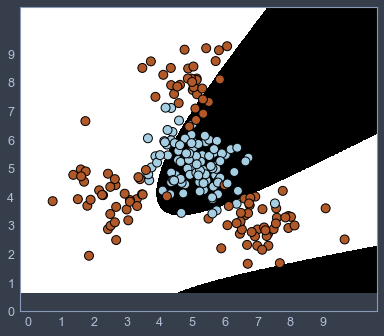

########################################################################################################################
-------------------------------我是依然优雅简洁智慧伟岸的分割线----------------------------------------
########################################################################################################################


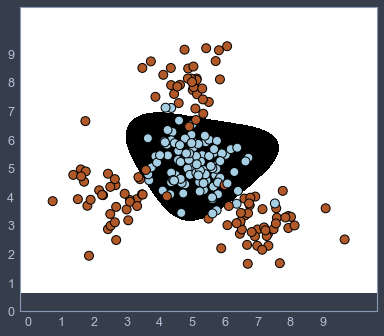

In [50]:
# svm线性分类器
from sklearn.svm import SVC

X_train,X_test,y_train,y_test = train_test_split(data_multivar.iloc[:,0:2].values,data_multivar[2],test_size=0.25,random_state=7)

params = {'kernel':'linear'}
svm_classifier = SVC(**params)
svm_classifier.fit(X_train,y_train)
y_pred = svm_classifier.predict(X_test)
plot_classifier(svm_classifier,X_train,y_train)
plot_classifier(svm_classifier,X_test,y_test)
print(classification_report(y_test,y_pred))

print('#'*120)
print("-------------------------------我是优雅简洁智慧伟岸的分割线--------------------------------------------")
print('#'*120)

# svm非线性分类器：多项式分类器
params = {"kernel":'poly','degree':5}
svm_classifier_poly = SVC(**params)
svm_classifier_poly.fit(X_train,y_train)
plot_classifier(svm_classifier_poly,X_train,y_train)

print('#'*120)
print("-------------------------------我是依然优雅简洁智慧伟岸的分割线----------------------------------------")
print('#'*120)

# 支持向量机：rbf模式
params = {"kernel":'rbf'}
svm_classifier_rbf = SVC(**params)
svm_classifier_rbf.fit(X_train,y_train)
plot_classifier(svm_classifier_rbf,X_train,y_train)

In [51]:
traffic_data  = pd.read_csv('data_cache/traffic_data.txt',header=None)
traffic_data.columns = ['week','time','match','fighting','car_numbers']
data = traffic_data.values
# 数据预处理
label_coder=[]
data_encoded = np.empty(data.shape)
data_encoded[:,4]=data[:,4]
label_coder.append(preprocessing.LabelEncoder())
data_encoded[:,1] = label_coder[-1].fit_transform(data[:,1])
data_encoded[:,3] = label_coder[-1].fit_transform(data[:,3])
data_encoded[:,2] = label_coder[-1].fit_transform(data[:,2])
data_encoded[:,0] = label_coder[-1].fit_transform(data[:,0])
X = data_encoded[:,:-1].astype(int)
y = data_encoded[:,-1].astype(int)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=5)

In [52]:
from sklearn.svm import SVR

params = {'kernel':'rbf' , 'C':10.0 , 'epsilon':0.2}
svm_regressor = SVR(**params)
svm_regressor.fit(X_train,y_train)
y_pred = svm_regressor.predict(X_test)
print('平均绝对误差=', round(sm.mean_absolute_error(y_test,y_pred),2))
 #均方误差越低越好,保持最低
print('均方误差=', round(sm.mean_squared_error(y_test,y_pred),2))
# 消除异常值干扰
print('中位数绝对误差=', round(sm.median_absolute_error(y_test,y_pred),2))
#解释方差越高越好，保持最高,对数据集的波动解释能力，最高1.0
print('解释方差得分=', round(sm.explained_variance_score(y_test,y_pred),2)) 
# R方反应数据的确定性相关系数，越高越好，最高1.0
print('R方得分=', round(sm.r2_score(y_test,y_pred),2))


平均绝对误差= 7.33
均方误差= 107.47
中位数绝对误差= 4.98
解释方差得分= 0.47
R方得分= 0.46


In [53]:
# 与随机森林对比

rf_regressor = RandomForestRegressor(n_estimators=2000,min_samples_split=10)
rf_regressor.fit(X_train,y_train)
y_pred = rf_regressor.predict(X_test)
print('平均绝对误差=', round(sm.mean_absolute_error(y_test,y_pred),2))

'''均方误差越低越好,保持最低'''
print('均方误差=', round(sm.mean_squared_error(y_test,y_pred),2))

'''消除异常值干扰'''
print('中位数绝对误差=', round(sm.median_absolute_error(y_test,y_pred),2))

'''解释方差越高越好，保持最高,对数据集的波动解释能力，最高1.0'''
print('解释方差得分=', round(sm.explained_variance_score(y_test,y_pred),2)) 

'''R方反应数据的确定性相关系数，越高越好，最高1.0'''
print('R方得分=', round(sm.r2_score(y_test,y_pred),2))

平均绝对误差= 4.47
均方误差= 42.14
中位数绝对误差= 3.11
解释方差得分= 0.79
R方得分= 0.79


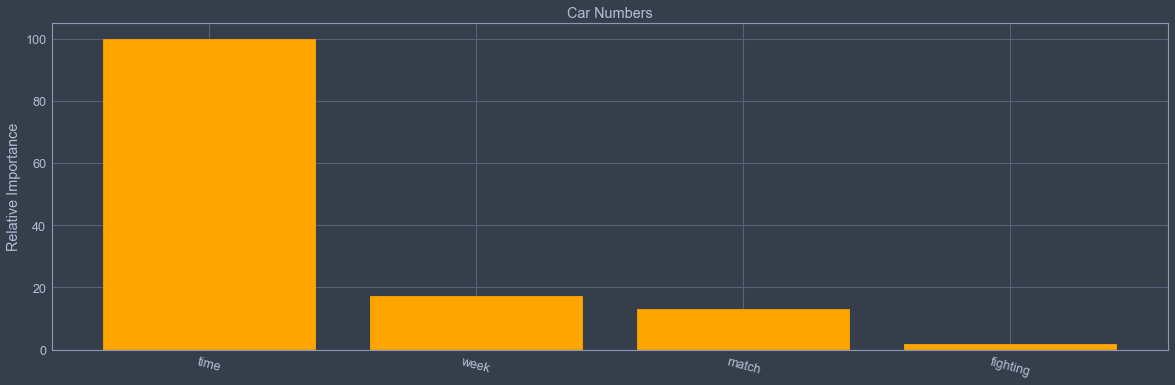

In [54]:
pfi(rf_regressor.feature_importances_,feature_names=traffic_data.columns[0:4],color='orange',
    title='Car Numbers')

# 聚类

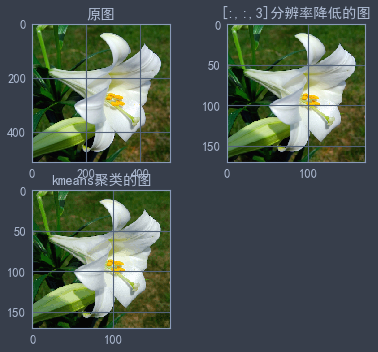

In [55]:
from sklearn.cluster import KMeans 
import imageio

def cut_photo(image):
    '''每三个点分割图片,降低像素'''
    image_2 = image[::3, ::3]
    return image_2

def km_cut(image_2,n = 64):
    '''用kmeans划分数组'''
    X = image_2.reshape(-1, 3)  # 降低分辨率并改变数组结构
    km = KMeans(n_clusters=100)
    km_china = km.fit_predict(X)
    colors = km.cluster_centers_
    new_image = colors[km_china]
    new_image = new_image.reshape(image_2.shape)
    return new_image

def plot_photo(X,sub,title):
    '''画图的函数,X是数据集,sub是图像在子图的位置,title是标题'''
    plt.figure(1)
    plt.subplot(sub)
    plt.imshow(X)
    plt.title(title)


image = imageio.imread('data_cache/flower_image.jpg')
plot_photo(image,sub = 221,title = '原图') # 画第一张图片
image_2 = cut_photo(image) # 调用降低分辨率
plot_photo(image_2,sub = 222,title = '[:,:,3]分辨率降低的图') # 画第二张图片
new_image = km_cut(image_2,100) # kmeans压缩图片
plot_photo(new_image.astype(np.uint8),sub = 223,title = 'kmeans聚类的图') # 画第三张图片

'''解决中文乱码问题'''
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.show()

集群数目为: 4


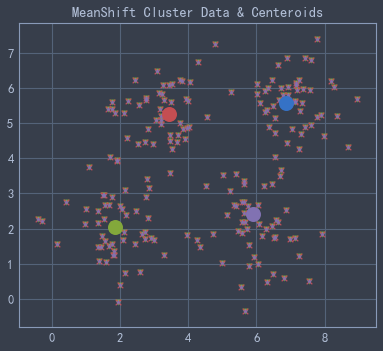

0.5768548615665261


In [56]:
from sklearn.cluster import MeanShift,estimate_bandwidth
from itertools import cycle
import sklearn.metrics as ms

data =  pd.read_csv('E:\learn\python\datasets\Chapter04\data_multivar.csv',header=None)
bandwidth = estimate_bandwidth(data.values,quantile=0.1,n_samples=len(data))
meanshift_cluster = MeanShift(bandwidth=bandwidth,bin_seeding=True)
meanshift_cluster.fit(data.values)
labels = meanshift_cluster.labels_
centeroids = meanshift_cluster.cluster_centers_
num_clusters = len(np.unique(labels))
print('集群数目为:',num_clusters)

# 集群可视化:画出数据点和集群中心
plt.figure()
# 设置集群标记
markers = '.vx*'
# 迭代群标记
for i,marker in zip(range(num_clusters),markers):
    # 画出集群数据点
    plt.scatter(data[0],data[1],marker = marker )
    # 画出集群中心
    centeroid = centeroids[i]
    plt.plot(centeroid[0],centeroid[1],marker = 'o',markersize=15)
    
plt.title('MeanShift Cluster Data & Centeroids')
plt.show()
meanshift_score = ms.silhouette_score(data,meanshift_cluster.labels_,metric='euclidean',sample_size=len(data))
print(meanshift_score)

In [57]:
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import SpectralClustering
from sklearn.cluster import Birch
from sklearn.cluster import DBSCAN

data =  pd.read_csv('E:\learn\python\datasets\Chapter04\data_multivar.csv',header=None)
ap_cluster = AffinityPropagation()
ap_cluster.fit(data)
ap_score = ms.silhouette_score(data,ap_cluster.labels_,metric='euclidean',sample_size=len(data))
print('AffinityPropragation得分：',ap_score)

spectral_cluster = SpectralClustering(n_clusters=4)
spectral_cluster.fit(data)
spectral_score = ms.silhouette_score(data,spectral_cluster.labels_,metric='euclidean',sample_size=len(data))
print('谱聚类得分：',spectral_score)

birch_cluster = Birch()
birch_cluster.fit(data)
birch_score = ms.silhouette_score(data,birch_cluster.labels_,metric='euclidean',sample_size=len(data))
print('Birch方法得分：',birch_score)

dbscan_cluster = DBSCAN()
dbscan_cluster.fit(data)
db_score = ms.silhouette_score(data,dbscan_cluster.labels_,metric='euclidean',sample_size=len(data))
print('DBSCAN方法得分：',db_score)

AffinityPropragation得分： 0.3395021133876932
谱聚类得分： 0.5758330295095894
Birch方法得分： 0.4387965331496983
DBSCAN方法得分： 0.3489543894412516


集群数目为: 8


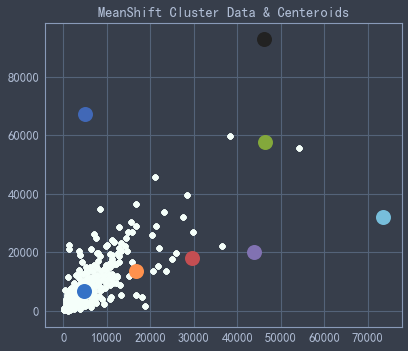

0.654825303473495


In [58]:
data = pd.read_csv("E:/learn/python/datasets/Chapter04/wholesale.csv")
data = data.iloc[:,2:]

bandwidth = estimate_bandwidth(data.values,quantile=0.8,n_samples=len(data))
meanshift_cluster = MeanShift(bandwidth=bandwidth,bin_seeding=True)
meanshift_cluster.fit(data.values)
labels = meanshift_cluster.labels_
centeroids = meanshift_cluster.cluster_centers_
num_clusters = len(np.unique(labels))
print('集群数目为:',num_clusters)

# 集群可视化:画出数据点和集群中心
plt.figure()
# 设置横纵坐标，集群中心
data2 = data.iloc[:,1:3]
centeroids2 = centeroids[:,1:3]
# 迭代群标记
for i in range(num_clusters):
    # 画出集群数据点
    plt.scatter(data2['Milk'],data2['Grocery'], color='#F5FFFA' )
    # 画出集群中心
    centeroid = centeroids2[i]
    plt.plot(centeroid[0],centeroid[1],marker = 'o',markersize=15)
    
plt.title('MeanShift Cluster Data & Centeroids')
plt.show()
meanshift_score = ms.silhouette_score(data,meanshift_cluster.labels_,metric='euclidean',sample_size=len(data))
print(meanshift_score)

AffinityPropragation得分： 0.233960416771773
集群数目为: 37


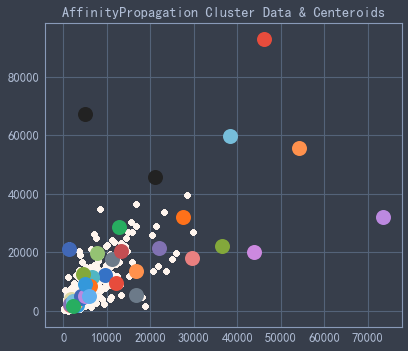

谱聚类得分： -0.008029255784850293
Birch方法得分： 0.37501552145375117


In [59]:
ap_cluster = AffinityPropagation()
ap_cluster.fit(data.values)
ap_score = ms.silhouette_score(data,ap_cluster.labels_,metric='euclidean',sample_size=len(data))
print('AffinityPropragation得分：',ap_score)
labels = ap_cluster.labels_
centeroids = ap_cluster.cluster_centers_
num_clusters = len(np.unique(labels))
print('集群数目为:',num_clusters)

# 集群可视化:画出数据点和集群中心
plt.figure()
# 设置横纵坐标，集群中心
data2 = data.iloc[:,1:3]
centeroids2 = centeroids[:,1:3]
for i in range(num_clusters):
    # 画出集群数据点
    plt.scatter(data2['Milk'],data2['Grocery'],color='#FFF5EE' )
    # 画出集群中心
    centeroid = centeroids2[i,:]
    plt.plot(centeroid[0],centeroid[1],marker='o',markersize=15)    
plt.title('AffinityPropagation Cluster Data & Centeroids')
plt.show()

spectral_cluster = SpectralClustering(n_clusters=2)
spectral_cluster.fit(data)
spectral_score = ms.silhouette_score(data,spectral_cluster.labels_,metric='euclidean',sample_size=len(data))
print('谱聚类得分：',spectral_score)

birch_cluster = Birch()
birch_cluster.fit(data.values)
birch_score = ms.silhouette_score(data,birch_cluster.labels_,metric='euclidean',sample_size=len(data))
print('Birch方法得分：',birch_score)

# 构建推荐引擎：机器学习流水线

In [60]:
# 构建机器学习流水线
from sklearn.feature_selection import SelectKBest , f_regression
from sklearn.pipeline import Pipeline


# 数据采集：使用数据以及预处理如下

data=pd.read_csv('https://labfile.oss.aliyuncs.com/courses/1283/adult.data.csv')
print(data.shape)
data = data.values

# 数据预处理
label_coder=[]
data_encoded = np.empty(data.shape)
data_encoded[:,0]=data[:,0]
data_encoded[:,2]=data[:,2]
data_encoded[:,4]=data[:,4]
data_encoded[:,10]=data[:,10]
data_encoded[:,11]=data[:,11]
data_encoded[:,12]=data[:,12]
label_coder.append(preprocessing.LabelEncoder())
data_encoded[:,1] = label_coder[-1].fit_transform(data[:,1])
data_encoded[:,3] = label_coder[-1].fit_transform(data[:,3])
data_encoded[:,5] = label_coder[-1].fit_transform(data[:,5])
data_encoded[:,6] = label_coder[-1].fit_transform(data[:,6])
data_encoded[:,7] = label_coder[-1].fit_transform(data[:,7])
data_encoded[:,8] = label_coder[-1].fit_transform(data[:,8])
data_encoded[:,9] = label_coder[-1].fit_transform(data[:,9])
data_encoded[:,13] = label_coder[-1].fit_transform(data[:,13])
data_encoded[:,14] = label_coder[-1].fit_transform(data[:,14])
X = data_encoded[:,:-1].astype(int)
y = data_encoded[:,-1].astype(int)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.94,random_state=5)

# 特征选择器
selectkbest = SelectKBest(f_regression,k=10)

# 运用随机森林分类器构建机器学习流水线
rf_classifier = RandomForestClassifier(n_estimators=195,random_state=1500,max_depth=14)
pipeline_classifier = Pipeline([('selector',selectkbest),('rf',rf_classifier)])

# 训练数据
pipeline_classifier.fit(X_train,y_train)

# 预测数据
y_pred = pipeline_classifier.predict(X_test)
print("预测结果为：",y_pred)

# 流水线得分
print('流水线得分为：',str(round(100*pipeline_classifier.score(X_train,y_train),2)),'%')
f1 = cross_val_score(pipeline_classifier,X,y,scoring='f1_weighted',cv=5)
print('F1得分为：',str(round(100*f1.mean(),2)),'%')

# 查看被选中的特征


(32561, 15)
预测结果为： [0 0 0 ... 1 1 0]
流水线得分为： 97.85 %
F1得分为： 85.7 %
